In [2]:
#Nama Kelompok
#Ahmad Muslikhul Imam - 2020-319
#Muh.Rayhan Islamiah P - 2020-333

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

dataset_path = '/content/drive/MyDrive/UAS AI/Dataset Daun'

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/UAS AI/Dataset Daun')
!ls

'Belimbing Wuluh'  'Jeruk Nipis'  'Lidah Buaya'   Pandan   Seledri
'Jambu Biji'	    Kemangi	   Nangka	  Pepaya   Sirih


In [6]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3500 files belonging to 10 classes.
Using 2800 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3500 files belonging to 10 classes.
Using 700 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Belimbing Wuluh', 'Jambu Biji', 'Jeruk Nipis', 'Kemangi', 'Lidah Buaya', 'Nangka', 'Pandan', 'Pepaya', 'Seledri', 'Sirih']


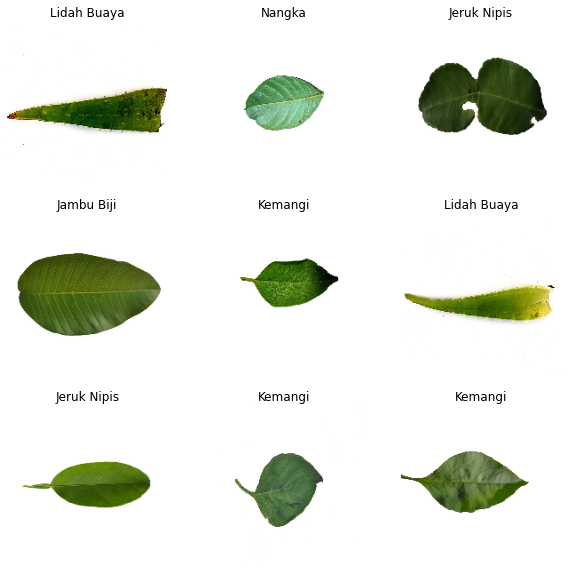

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
88/88 [==============================] - 394s 4s/step - loss: 1.7061 - accuracy: 0.4043 - val_loss: 1.0756 - val_accuracy: 0.6586
Epoch 2/10
88/88 [==============================] - 131s 1s/step - loss: 0.9083 - accuracy: 0.6968 - val_loss: 0.8387 - val_accuracy: 0.7271
Epoch 3/10
88/88 [==============================] - 126s 1s/step - loss: 0.6223 - accuracy: 0.7954 - val_loss: 0.7546 - val_accuracy: 0.7486
Epoch 4/10
88/88 [==============================] - 127s 1s/step - loss: 0.4332 - accuracy: 0.8511 - val_loss: 0.7320 - val_accuracy: 0.7829
Epoch 5/10
88/88 [==============================] - 125s 1s/step - loss: 0.2947 - accuracy: 0.8971 - val_loss: 0.6681 - val_accuracy: 0.8114
Epoch 6/10
88/88 [==============================] - 130s 1s/step - loss: 0.1811 - accuracy: 0.9432 - val_loss: 0.6801 - val_accuracy: 0.8071
Epoch 7/10
88/88 [==============================] - 127s 1s/step - loss: 0.1277 - accuracy: 0.9607 - val_loss: 0.7877 - val_accuracy: 0.8229
Epoch 8/10
88

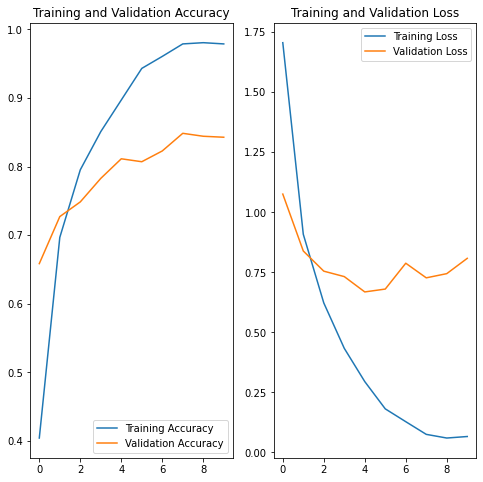

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()